# 階層的クラスタ分析

Iris を対象として階層的クラスタ分析。

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


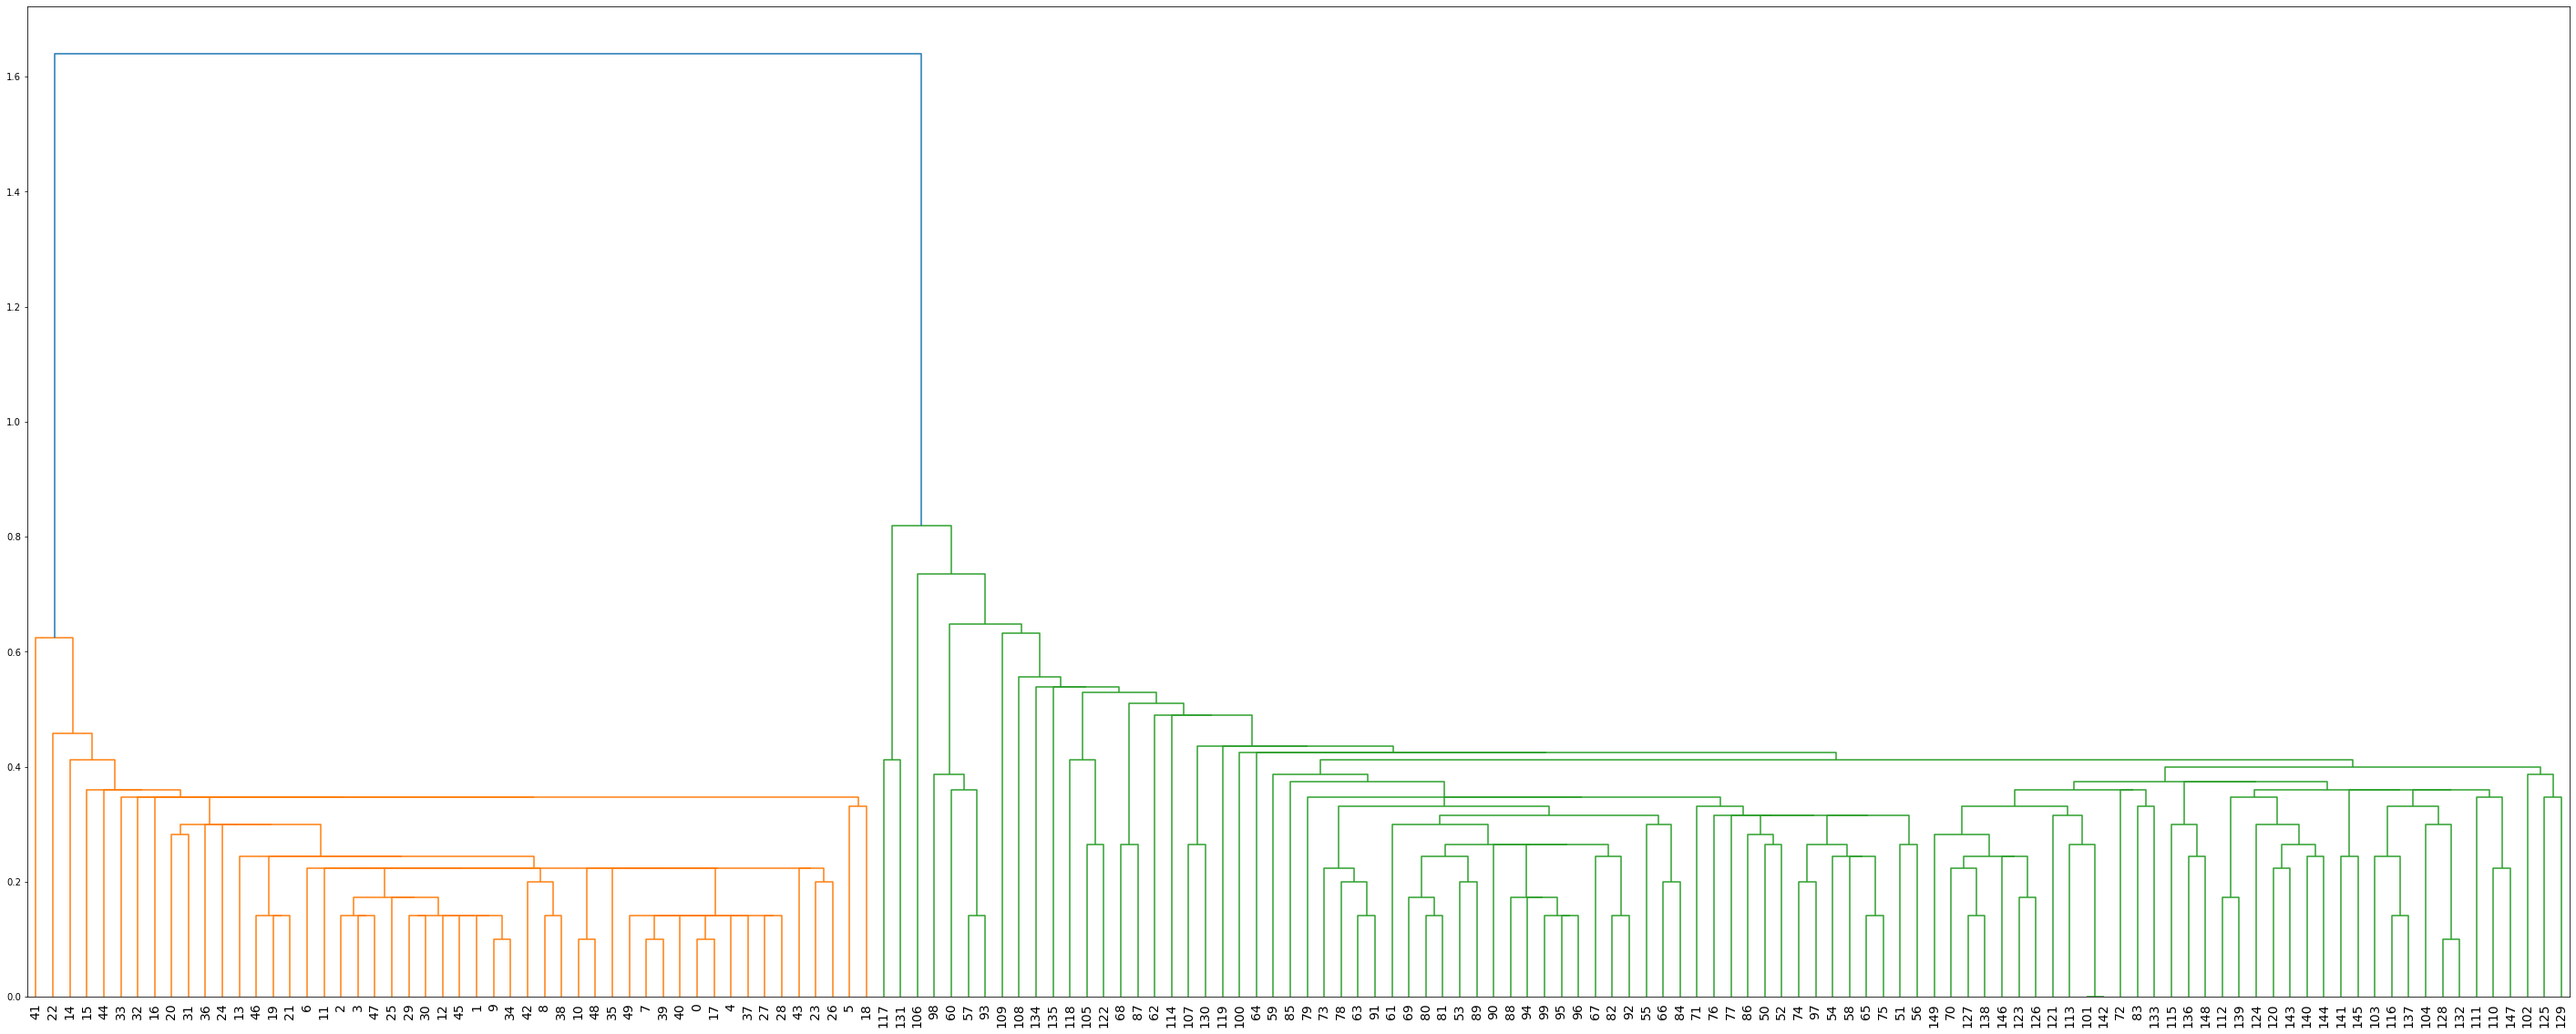

In [2]:
# クラスタリング対象のデータから species 列を削除
X = iris.drop(['species'], axis=1)

# 階層的凝集クラスタリング
# - metric='euclidean' ユークリッド距離
# - method='single' 最小非類似度
clusters = linkage(X.values, method='single', metric='euclidean')

# 樹形図を作成
plt.figure(figsize=(50, 20))
dendr = dendrogram(clusters, labels=X.index, leaf_font_size=14)

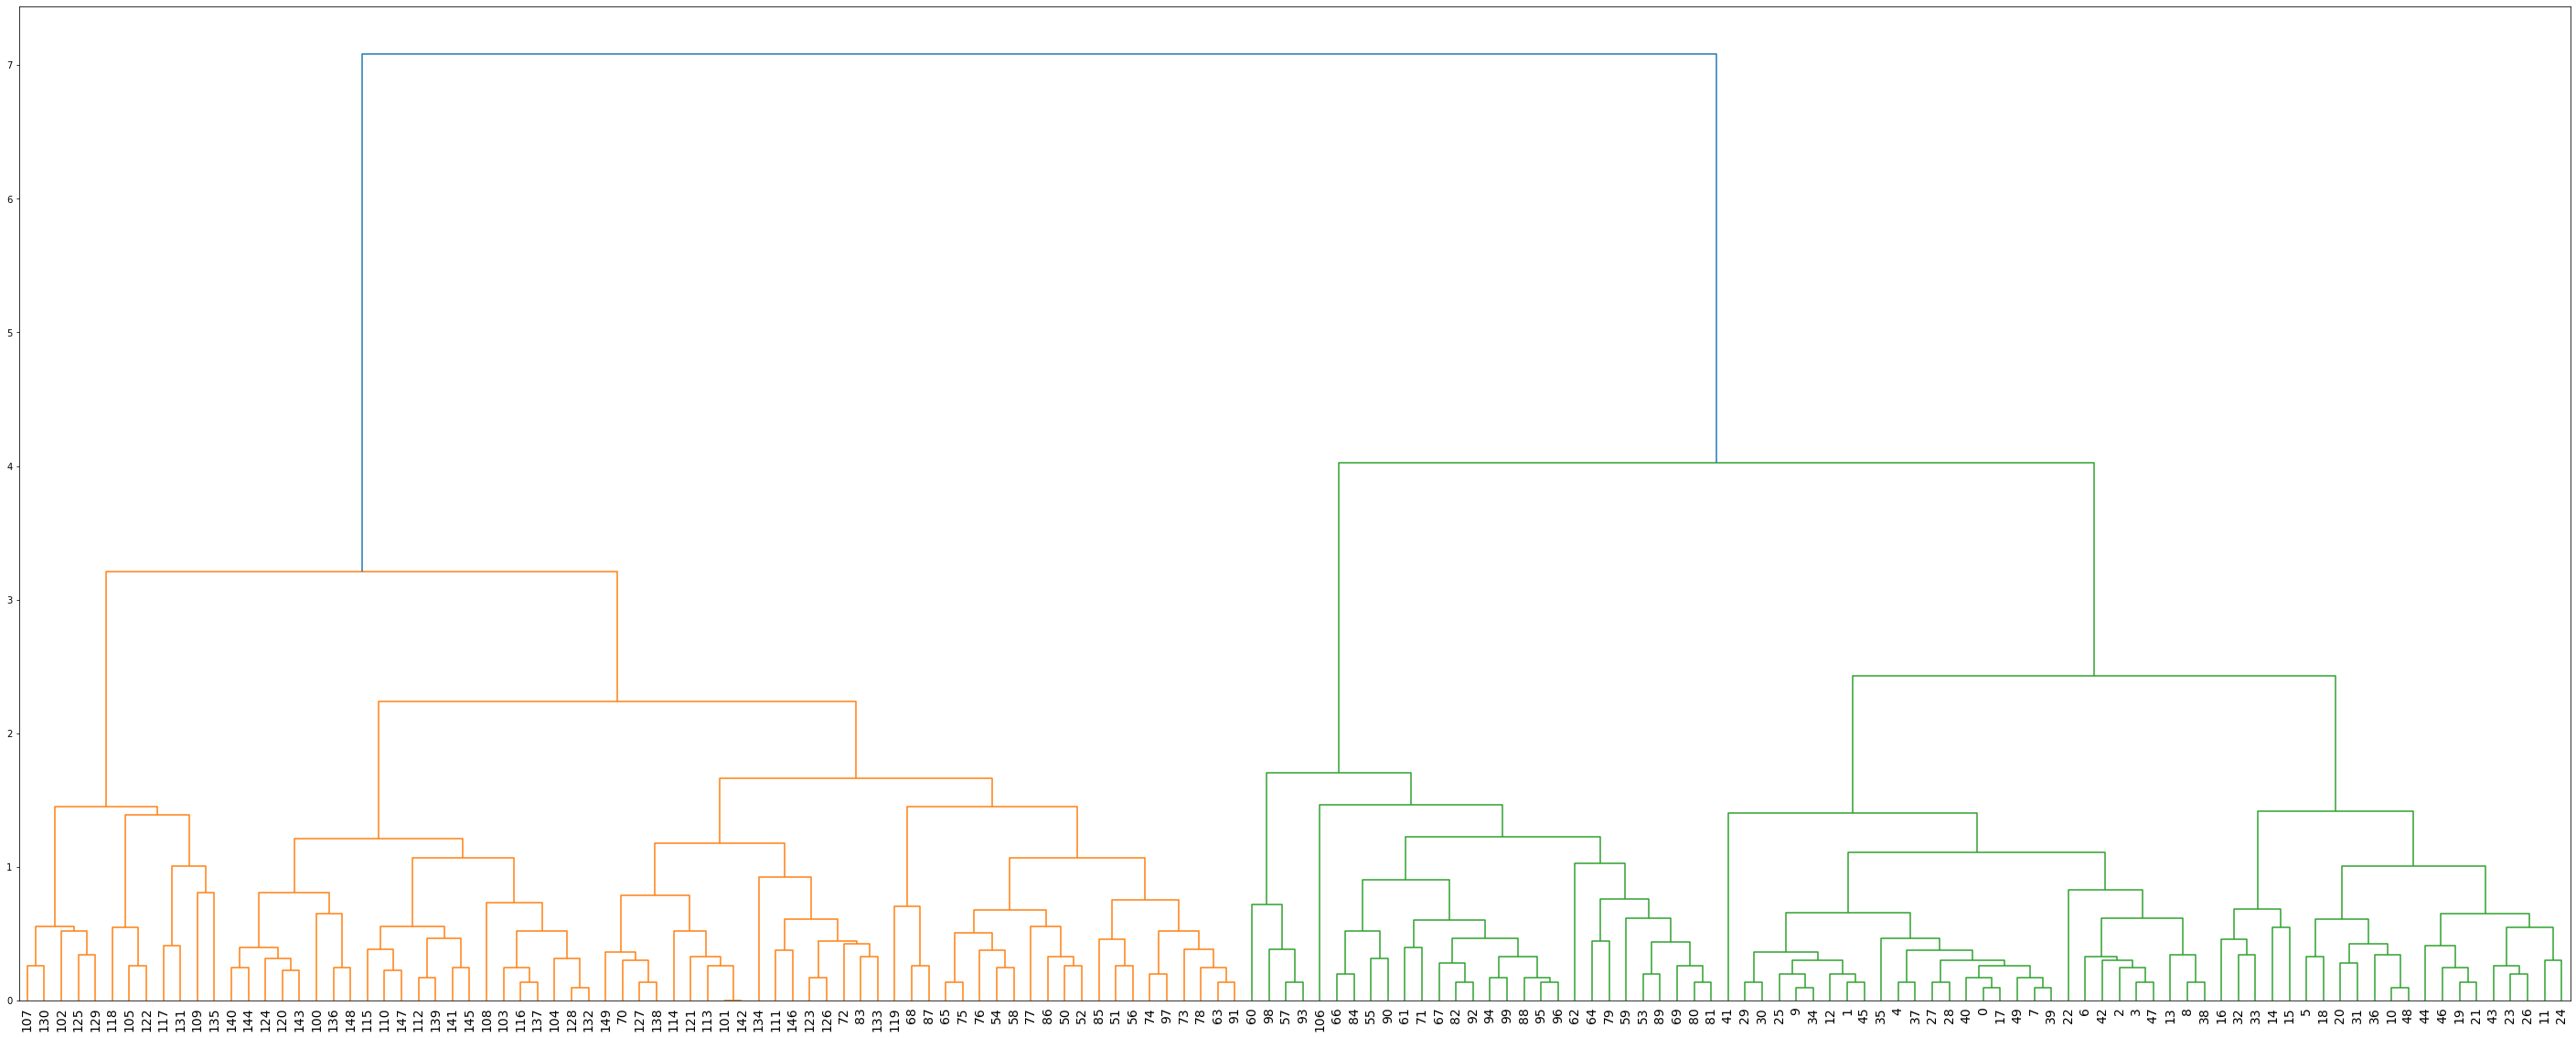

In [3]:
# - method='complete' 最大非類似度
plt.figure(figsize=(50, 20))
clusters = linkage(X.values, method='complete', metric='euclidean')
dendr = dendrogram(clusters, labels=X.index, leaf_font_size=14)

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.00000000e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.00000000e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.00000000e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.00000000e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.00000000e-01 2.00000000e+00]
 [4.00000000e+00 3.70000000e+01 1.41421356e-01 2.00000000e+00]
 [1.90000000e+01 2.10000000e+01 1.41421356e-01 2.00000000e+00]
 [2.90000000e+01 3.00000000e+01 1.41421356e-01 2.00000000e+00]
 [5.70000000e+01 9.30000000e+01 1.41421356e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.41421356e-01 2.00000000e+00]
 [1.16000000e+02 1.37000000e+02 1.41421356e-01 2.00000000e+00]
 [8.00000000e+00 3.80000000e+01 1.41421356e-01 2.00000000e+00]
 [3.00000000e+00 4.70000000e+01 1.41421356e-01 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 1.41421356e-01 2.00000000e+00]
 [8.20000000e+01 9.20000000e+01 1.41421356e-01 2.000000

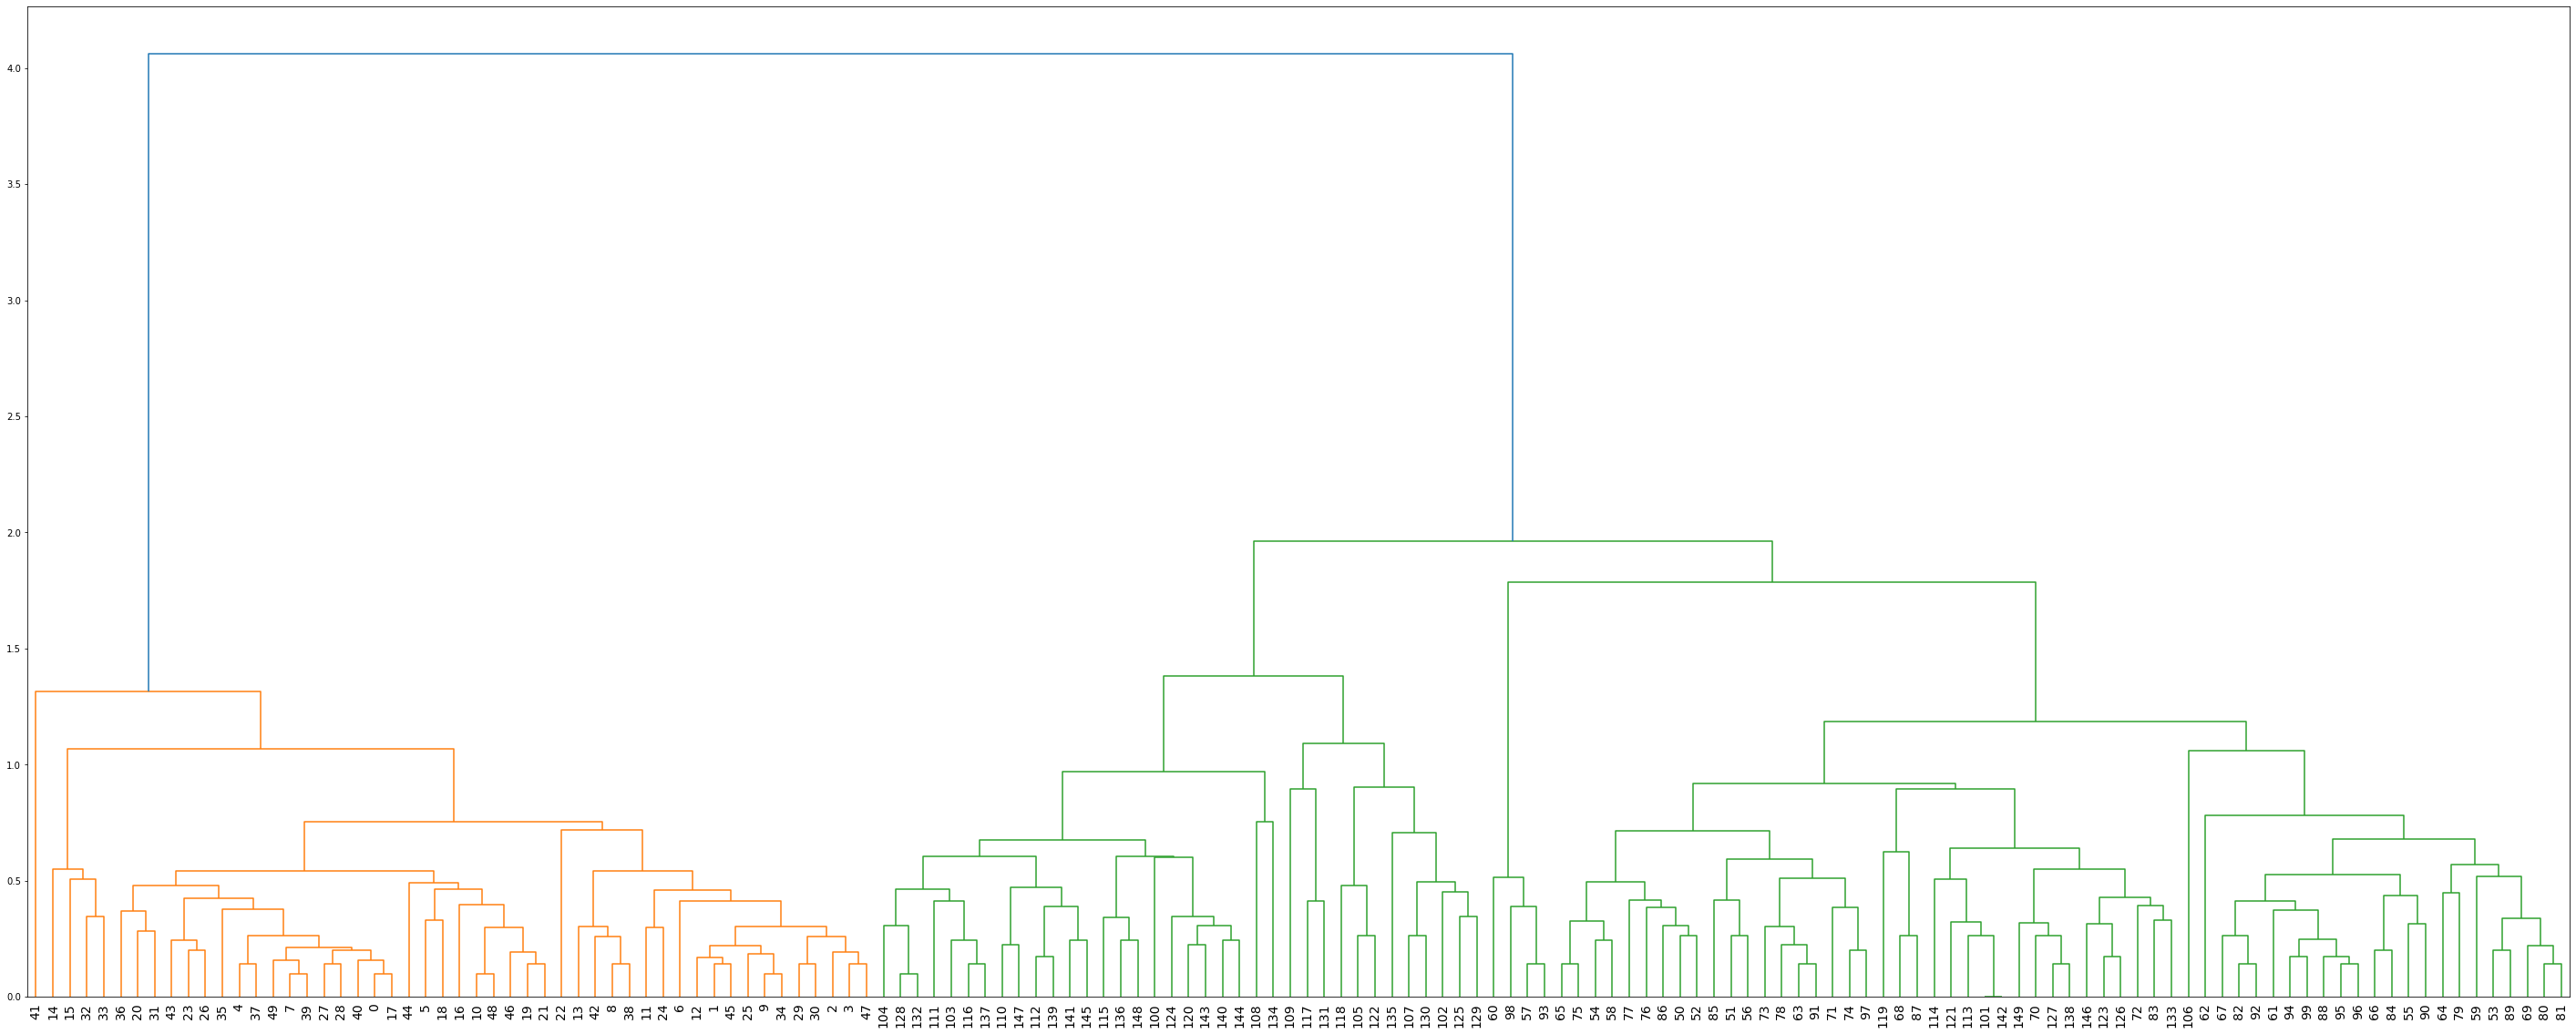

In [13]:
# - method='average' 平均非類似度
plt.figure(figsize=(50, 20))
clusters = linkage(X.values, method='average', metric='euclidean')
dendr = dendrogram(clusters, labels=X.index, leaf_font_size=14)

### クラスタの類似度の違い

- 最小非類似度では、データを1つ1つ統合しながら、クラスタが大きくなる傾向がある。
- 一方、最大非類似度、平均非類似度では、クラスタが同程度の大きさになる傾向がある。

<hr>

### ヒートマップ付きの樹形図

ヒートマップは、数値の大小を色の濃さで表現する。

- 枝が最も長いところのヒートマップの濃淡の違い
- その下のクラスタのヒートマップの濃淡の違い

から、クラスタの切れ目が見えやすい。

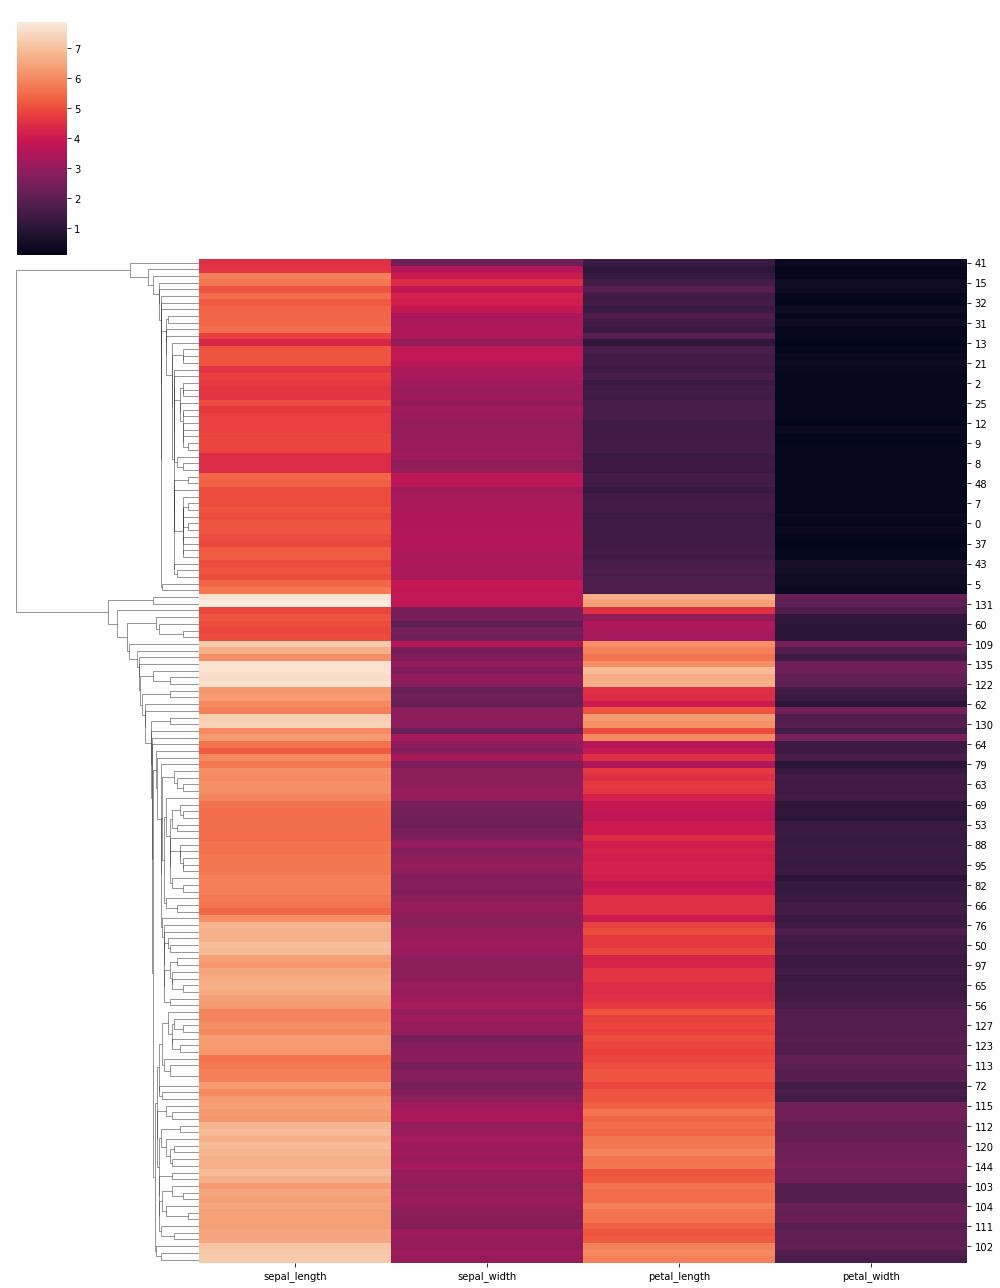

In [5]:
# clustermap: 樹形図が付いたヒートマップの作成
# - method='single' 最小非類似度
# - col_cluster=False 列について樹形図は作成しない
sns.clustermap(X, method='single', metric='euclidean', figsize=(14, 18),
               col_cluster=False)

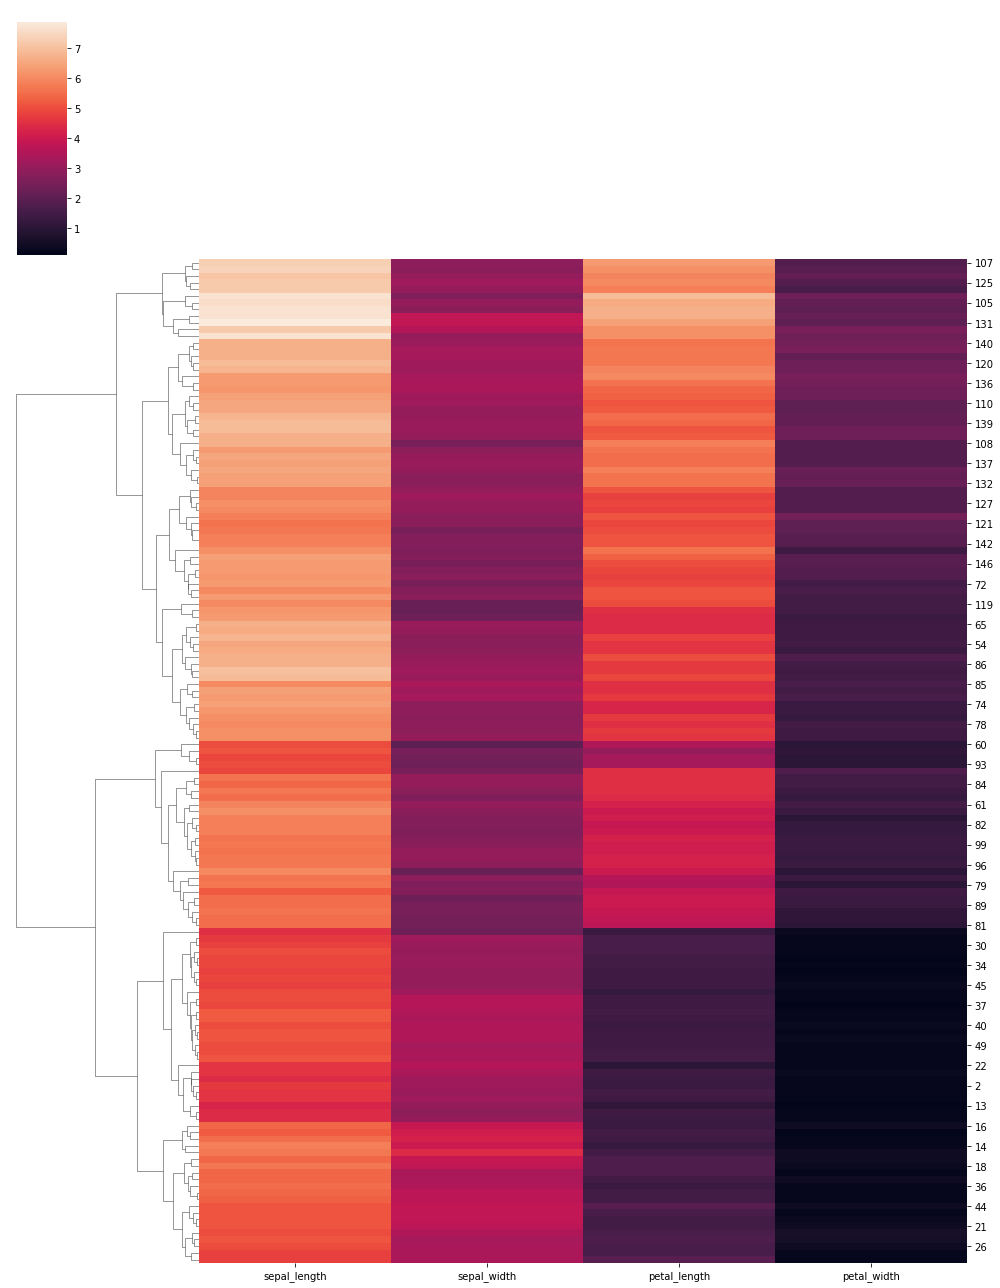

In [6]:
# - method='complete' 最大非類似度
sns.clustermap(X, method='complete', metric='euclidean', figsize=(14, 18),
               col_cluster=False)

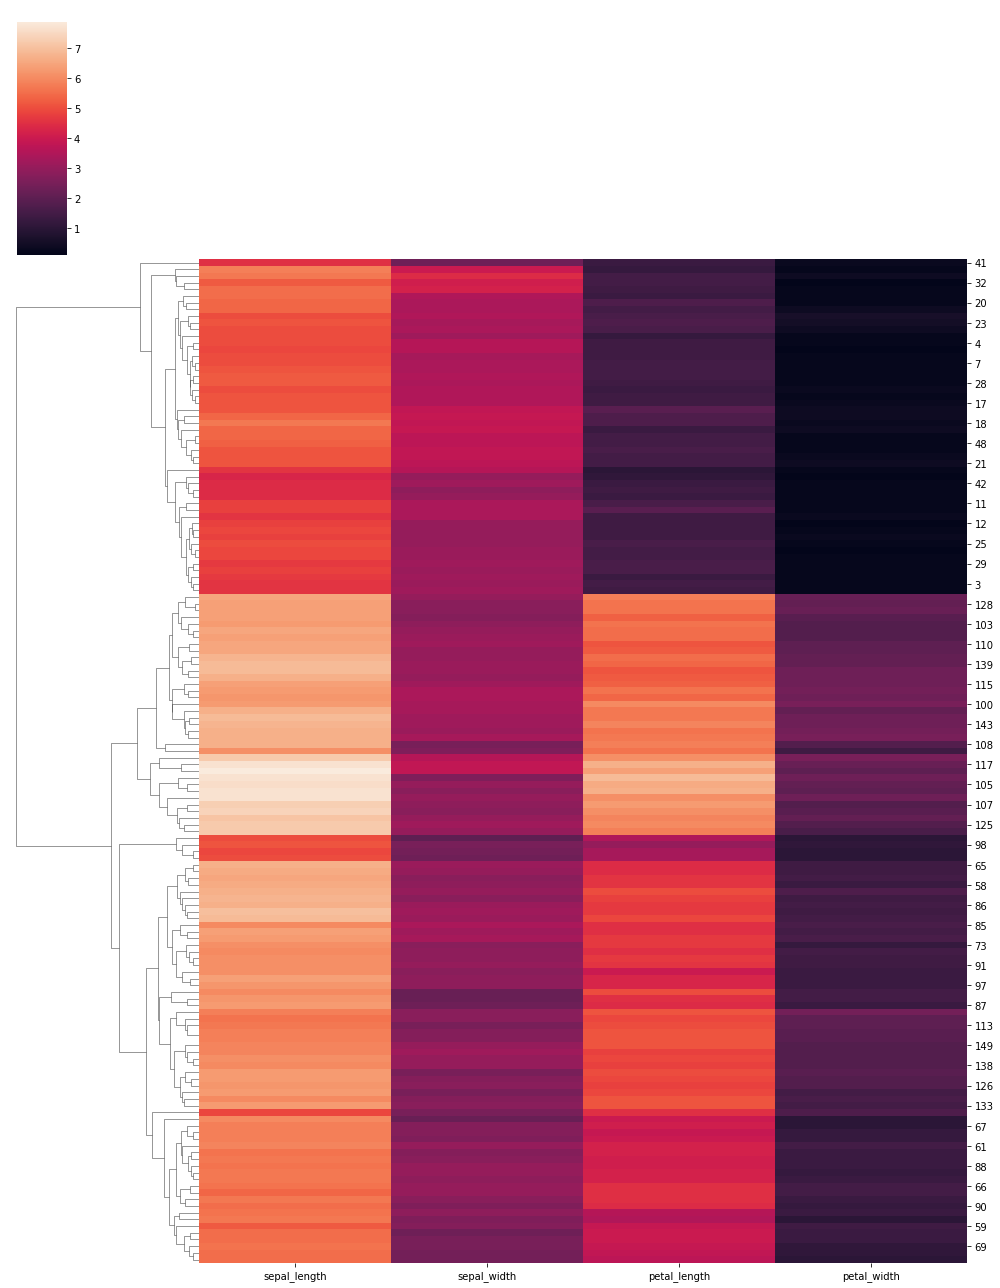

In [7]:
# - method='average' 平均非類似度
sns.clustermap(X, method='average', metric='euclidean', figsize=(14, 18),
               col_cluster=False)

In [ ]:
# - method='centroid' 重心法
sns.clustermap(X, method='centroid', metric='euclidean', figsize=(14, 18),
               col_cluster=False)

In [ ]:
# - method='ward' Ward法
sns.clustermap(X, method='ward', metric='euclidean', figsize=(14, 18),
               col_cluster=False)

<hr>

### クラスタ番号の取得

階層的クラスタ分析の結果を取得する。

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.00000000e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.00000000e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.00000000e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.00000000e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.00000000e-01 2.00000000e+00]
 [4.00000000e+00 3.70000000e+01 1.41421356e-01 2.00000000e+00]
 [1.90000000e+01 2.10000000e+01 1.41421356e-01 2.00000000e+00]
 [2.90000000e+01 3.00000000e+01 1.41421356e-01 2.00000000e+00]
 [5.70000000e+01 9.30000000e+01 1.41421356e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.41421356e-01 2.00000000e+00]
 [1.16000000e+02 1.37000000e+02 1.41421356e-01 2.00000000e+00]
 [8.00000000e+00 3.80000000e+01 1.41421356e-01 2.00000000e+00]
 [3.00000000e+00 4.70000000e+01 1.41421356e-01 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 1.41421356e-01 2.00000000e+00]
 [8.20000000e+01 9.20000000e+01 1.41421356e-01 2.000000

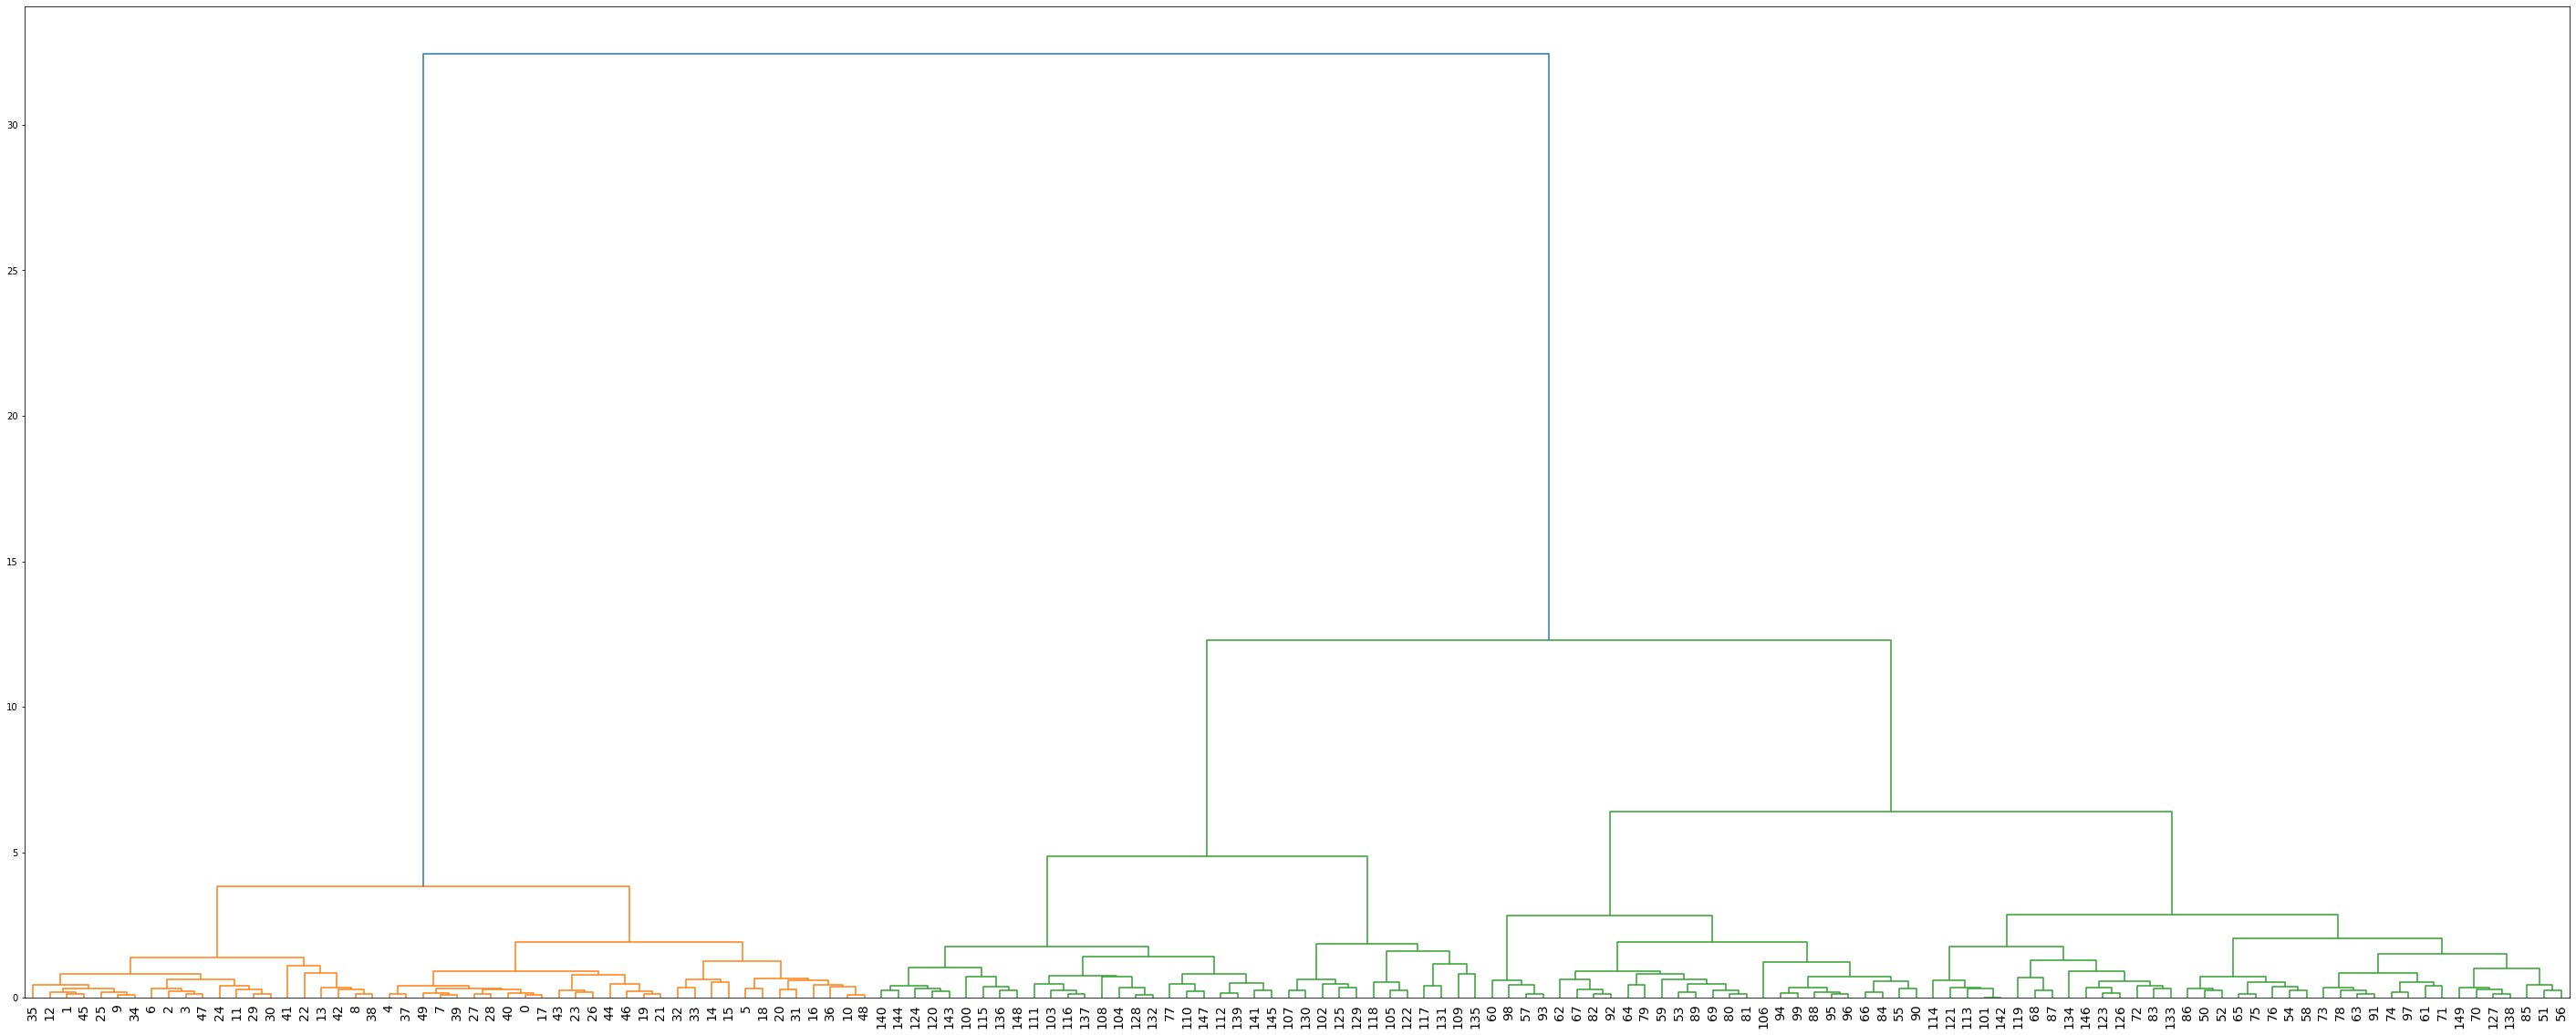

In [18]:
# linkage で距離の計算まで処理
# - metric='euclidean' ユークリッド距離
# - method='ward' ward法
row_clusters = linkage(X.values, method='ward', metric='euclidean')
# 樹形図を作成
plt.figure(figsize=(50, 20))
row_dendr = dendrogram(row_clusters, labels=X.index, leaf_font_size=14)

クラスタ数 3 のところの結果を取得する。

In [14]:
from scipy.cluster.hierarchy import cut_tree
# cut_tree: 指定したクラスタ数でのラベル（クラスタ番号）を取得
# - np.ndarray.flatten: cut_tree は多次元配列で返すので、1次元配列に変換
# print(cut_tree(row_clusters, 3))
labels = np.ndarray.flatten(cut_tree(row_clusters, 3))
# print(labels)
# iris.speciesには150個のデータがsetosa, virginica, virgicolorのどれなのかが記載されている
print(iris.species)

# クロス集計により species と比較する。
pd.crosstab(labels, iris.species)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


species,setosa,versicolor,virginica
row_0,,,
0,50,0,0
1,0,49,15
2,0,1,35


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

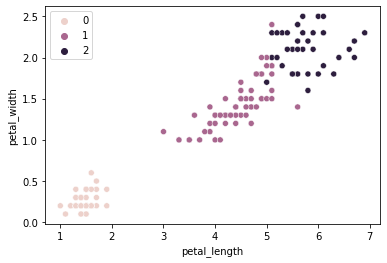

In [17]:
# クラスタリング結果を散布図で描画
sns.scatterplot(x=X.petal_length, y=X.petal_width, hue=labels)

<hr>

### クラスタリング方法の違いによる結果の差を散布図で確認

クラスタ数は 3 に固定。

最小非類似度


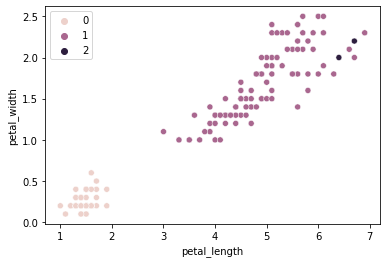

最大非類似度


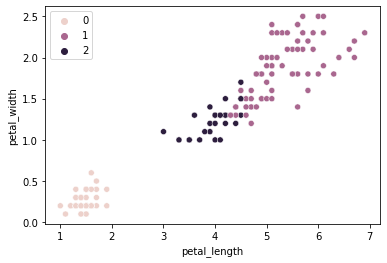

平均非類似度


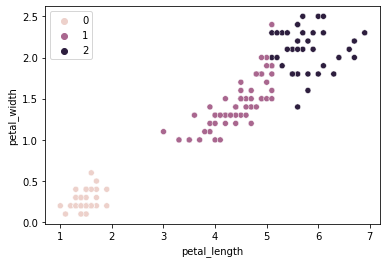

重心法


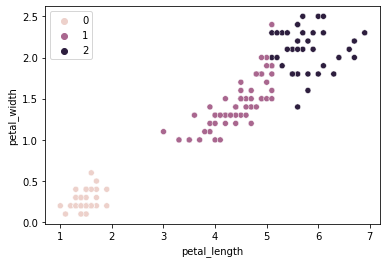

Ward法


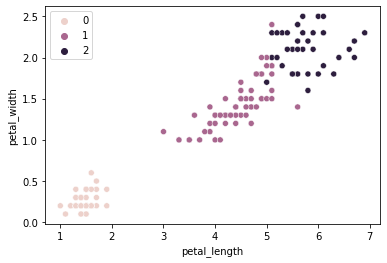

In [20]:
methods = {'single': '最小非類似度',
           'complete': '最大非類似度',
           'average': '平均非類似度',
           'centroid': '重心法',
           'ward': 'Ward法'}

for m in methods:
    row_clusters = linkage(X.values, method=m, metric='euclidean')
    labels = np.ndarray.flatten(cut_tree(row_clusters, 3))
    print(methods[m])
    sns.scatterplot(x=X.petal_length, y=X.petal_width, hue=labels)
    plt.show()